# Mood-Based Playlist Generator: A Music Recommendation System

* Build a playlist recommendation system that suggests songs based on mood categories
* Use clustering models to group songs by mood, leveraging acoustic features (valence, energy, tempo).
* Personalize playlists by allowing users to input their mood, and get dynamic song recommendations.

# Business Understanding

# Data Understanding

In [ ]:
pip install scikit-fuzzy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from textblob import TextBlob
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between data points and their respective cluster centroids
cluster_centroids = kmeans.cluster_centers_
assigned_clusters = data_for_clustering['kmeans_cluster'].values

# Calculate cosine similarity between each song and its assigned cluster centroid
cosine_scores = []
for i, song in enumerate(data_scaled):
    cluster_idx = assigned_clusters[i]
    centroid = cluster_centroids[cluster_idx].reshape(1, -1)
    song_vector = song.reshape(1, -1)
    similarity = cosine_similarity(song_vector, centroid)[0][0]
    cosine_scores.append(similarity)

# Add cosine similarity scores to the dataset
data_for_clustering['kmeans_cosine_similarity'] = cosine_scores

# Compute the average cosine similarity for K-Means clustering
avg_cosine_similarity = np.mean(cosine_scores)

# Print the average cosine similarity score
print(f"Average Cosine Similarity for K-Means: {avg_cosine_similarity:.4f}")

from sklearn.decomposition import PCA

# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) 

In [4]:
df=pd.read_csv('./spotify_songs.csv')
df

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,in_top_tracks
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.026100,0.000011,0.3560,0.5030,117.906,210133,4.0,1999,1999-11-02,0
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.012900,0.000071,0.1550,0.4890,103.680,206200,4.0,1999,1999-11-02,0
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.023400,0.000002,0.1220,0.3700,149.749,298893,4.0,1999,1999-11-02,0
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.163000,0.000004,0.1210,0.5740,96.752,213640,4.0,1999,1999-11-02,0
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.001620,0.105000,0.0789,0.5390,127.059,205600,4.0,1999,1999-11-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202896,4gVc1fgR0NksE2w6OlUjRh,Teeth of Frost,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],2,1,False,0.113,...,0.000001,0.844000,0.1170,0.1560,153.031,334480,4.0,2010,2010-04-27,0
202897,6vqiNsqJIXD5XGmKUSJ6Wv,Obscured Pyramid,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],3,1,False,0.156,...,0.486000,0.539000,0.3300,0.1230,85.661,92947,5.0,2010,2010-04-27,0
202898,1bINDW0Aub6GXpjsCqTCeJ,Ice Cracking in the Abyss,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],4,1,False,0.101,...,0.000002,0.841000,0.0766,0.1270,158.450,231373,4.0,2010,2010-04-27,0
202899,2IgGF8jzi1YsdpvK9yTxWF,Will Is the Only Fire Under an Avalanche,Into the Cryosphere,3jsJegcKkbezKeJwj7xcfE,['The Howling Wind'],['2cVlQgVDrQvxEZNbvwsAjR'],5,1,False,0.129,...,0.000012,0.826000,0.1160,0.2580,145.381,415587,4.0,2010,2010-04-27,0


In [6]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date', 'in_top_tracks'],
      dtype='object')

In [7]:
df.shape

(202901, 25)

In [8]:
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,in_top_tracks
count,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.000000,202901.00000,202901.000000,202901.000000,202901.000000,202901.000000,2.029010e+05,202901.000000,202901.000000,202901.00000
mean,7.553127,1.037654,0.489927,0.515870,5.213966,-11.709972,0.681993,0.081485,0.43975,0.289357,0.201269,0.433823,117.841706,2.494048e+05,3.829794,2003.767788,0.00002
std,5.578483,0.236580,0.185813,0.293075,3.531297,6.725615,0.465703,0.116412,0.38365,0.377455,0.181159,0.270260,30.986910,1.505563e+05,0.570314,8.948875,0.00444
min,1.000000,1.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,1909.000000,0.00000
25%,3.000000,1.000000,0.356000,0.262000,2.000000,-14.934000,0.000000,0.034500,0.03450,0.000012,0.096700,0.197000,94.703000,1.770400e+05,4.000000,2000.000000,0.00000
50%,7.000000,1.000000,0.497000,0.528000,5.000000,-9.863000,1.000000,0.043700,0.37500,0.011300,0.124000,0.412000,116.767000,2.282930e+05,4.000000,2005.000000,0.00000
75%,10.000000,1.000000,0.627000,0.774000,8.000000,-6.856000,1.000000,0.068600,0.85000,0.730000,0.244000,0.651000,137.065000,2.887550e+05,4.000000,2008.000000,0.00000
max,50.000000,9.000000,0.990000,1.000000,11.000000,4.651000,1.000000,0.969000,0.99600,1.000000,1.000000,1.000000,246.130000,6.054655e+06,5.000000,2020.000000,1.00000


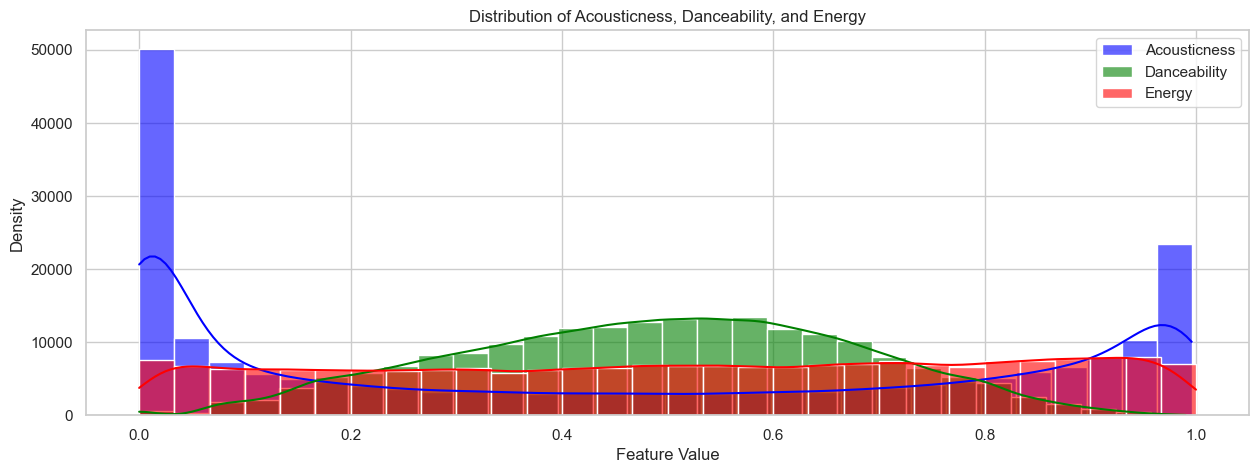

In [9]:
# Set visualization style
sns.set(style="whitegrid")

# Plot distributions
plt.figure(figsize=(15, 5))
sns.histplot(df["acousticness"], bins=30, kde=True, color="blue", label="Acousticness", alpha=0.6)
sns.histplot(df["danceability"], bins=30, kde=True, color="green", label="Danceability", alpha=0.6)
sns.histplot(df["energy"], bins=30, kde=True, color="red", label="Energy", alpha=0.6)
plt.legend()
plt.title("Distribution of Acousticness, Danceability, and Energy")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()

### Visualize Distribution of Artists and Songs

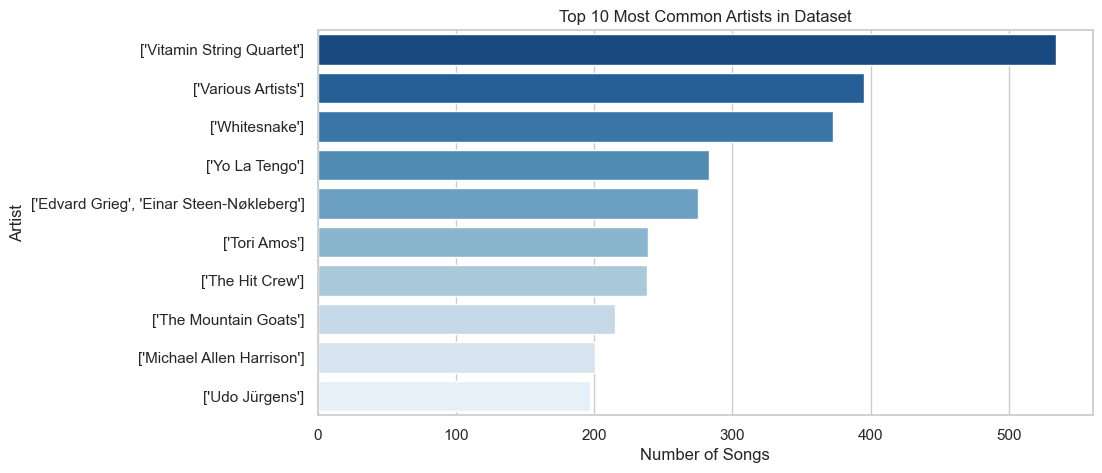

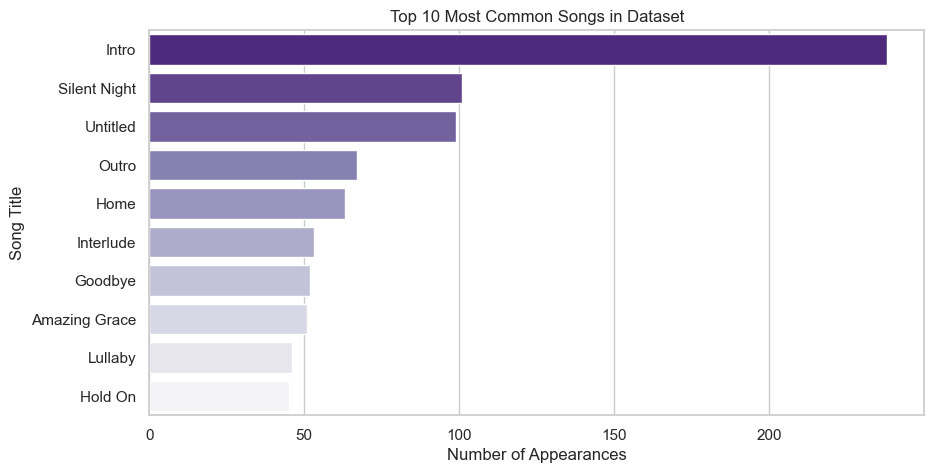

In [11]:
# Count top 10 most common artists
top_artists = df["artists"].value_counts().head(10)

# Count top 10 most common songs
top_songs = df["name"].value_counts().head(10)

# Plot top 10 artists
plt.figure(figsize=(10, 5))
sns.barplot(y=top_artists.index, x=top_artists.values, palette="Blues_r")
plt.title("Top 10 Most Common Artists in Dataset")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()

# Plot top 10 songs
plt.figure(figsize=(10, 5))
sns.barplot(y=top_songs.index, x=top_songs.values, palette="Purples_r")
plt.title("Top 10 Most Common Songs in Dataset")
plt.xlabel("Number of Appearances")
plt.ylabel("Song Title")
plt.show()


# Data Preparation

### Drop Unnamed, Target, Mode, Duration and columns

In [12]:
# Drop Unnamed and Target columns
df = df.drop(columns=["duration_ms"], errors="ignore")

### Correlation between features

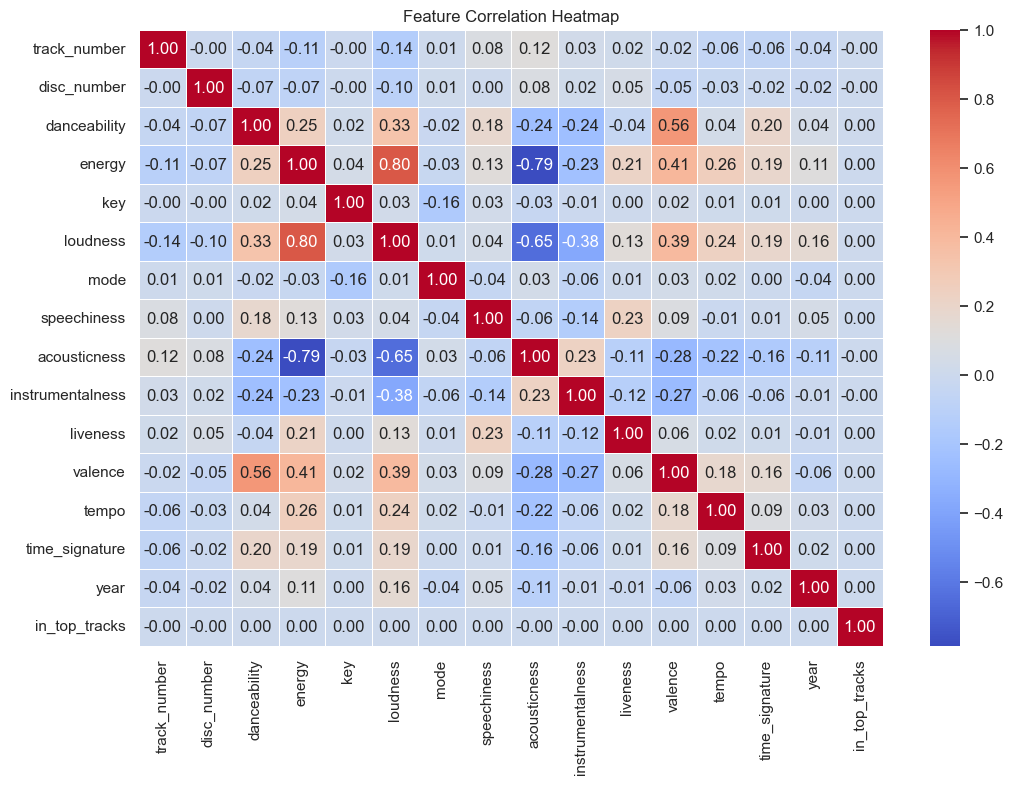

In [13]:
# Exclude "Unnamed: 0" and select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Drop Energy column
Since energy and loudness are highly correlated and energy and acousticness are highly correlated, I will drop energy as we are already getting similar information from the other features.

In [14]:
# Drop energy
df = df.drop(columns=["energy"], errors="ignore")

### Check for null values

In [15]:
# Check for missing values
df.isnull().sum()

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
year                0
release_date        0
in_top_tracks       0
dtype: int64

In [16]:
# Drop rows with any null values
df.dropna(inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
year                0
release_date        0
in_top_tracks       0
dtype: int64


### Drop duplicate songs
It looks like there are some duplicate songs in the data set. We will keep only one version if it has the same title and artist.

In [17]:
# Drop duplicate songs/ remixes
df = df.drop_duplicates(subset=["name", "artists"], keep="first").reset_index(drop=True)

In [18]:
#Check if there are any more duplicates
df.duplicated(subset=["name", "artists"], keep=False).sum()

0

In [19]:
df.shape

(199336, 23)

### Select only the features we will use for clustering

In [24]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year',
       'release_date', 'in_top_tracks'],
      dtype='object')

Features to Exclude
Metadata like id, name, album, artist_ids, release_date (Not useful for clustering).
Track structure details (track_number, disc_number) (Not indicative of song similarity).
Explicit content (explicit) (Doesn't indicate musical similarity).
Key & Mode (Not always helpful in clustering since many songs share the same key).

In [30]:
# Select relevant features for clustering
feature_cols = ['danceability', 'valence', 'tempo', 'acousticness',
                'instrumentalness', 'liveness', 'speechiness', 'loudness']

### Separate into liked and unheard songs

In [31]:
# Separate liked and unheard songs
liked_songs = df[df['in_top_tracks'] == 1]
unheard_songs = df[df['in_top_tracks'] == 0]

### Scale features

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_for_clustering = pd.concat([liked_songs, unheard_songs])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_for_clustering[feature_cols])

### Finding Optimal Number of Clusters for KMeans

k=2, Inertia=1228129.3772879236
k=3, Inertia=1080784.3584382387
k=4, Inertia=972279.6378172784
k=5, Inertia=895277.157272592
k=6, Inertia=805081.9452361825
k=7, Inertia=755152.0157387678
k=8, Inertia=706942.4361943754
k=9, Inertia=668352.3565577342
k=10, Inertia=635207.6346940632


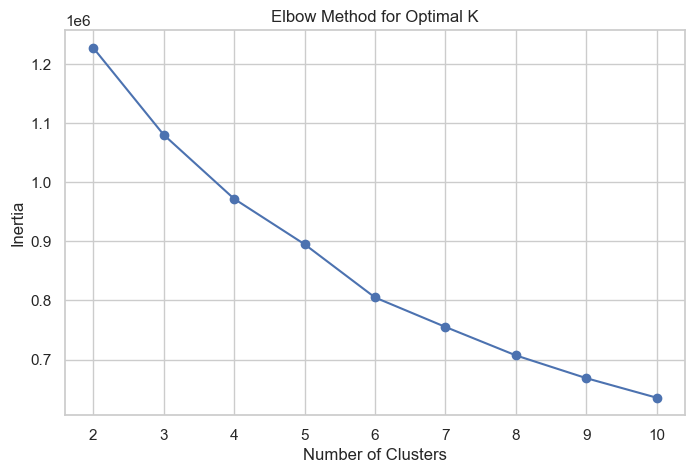

In [33]:
# Determine optimal number of clusters using Elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', algorithm='elkan')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Inertia={kmeans.inertia_}')  # Print inertia values

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### KMeans - 6 clusters

In [35]:
# Set optimal k
optimal_k = 6

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data_for_clustering['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

### Function to Evaluate Clustering (Compute Silhouette & Cosine Similarity Scores)

In [39]:
def evaluate_clustering(data_scaled, cluster_labels, cluster_centers):
    """
    Calculate the Silhouette Score and Cosine Similarity Score for clustering results.
    
    Parameters:
    - data_scaled: Scaled feature matrix (numpy array)
    - cluster_labels: Cluster assignments for each song
    - cluster_centers: Centroids of the clusters
    
    Returns:
    - silhouette_avg: Average Silhouette Score
    - avg_cosine_similarity: Average Cosine Similarity Score
    """

    # Compute Silhouette Score (Only valid if there is more than one cluster)
    if len(set(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    else:
        silhouette_avg = None  # Silhouette is not defined for a single cluster

    # Compute Cosine Similarity between each data point and its assigned cluster centroid
    cosine_scores = []
    for i, song_vector in enumerate(data_scaled):
        cluster_idx = cluster_labels[i]
        centroid = cluster_centers[cluster_idx].reshape(1, -1)
        song_vector = song_vector.reshape(1, -1)
        similarity = cosine_similarity(song_vector, centroid)[0][0]
        cosine_scores.append(similarity)

    # Compute the average cosine similarity score
    avg_cosine_similarity = np.mean(cosine_scores)

    return silhouette_avg, avg_cosine_similarity

### Evaluate KMeans - 6 clusters

In [ ]:
silhouette_score_kmeans, cosine_similarity_kmeans = evaluate_clustering(
    df_scaled, 
    data_for_clustering['kmeans_cluster'].values, 
    kmeans.cluster_centers_
)

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans:.4f}")
print(f"Cosine Similarity Score for K-Means: {cosine_similarity_kmeans:.4f}")

### KMeans - 7 clusters

In [ ]:
# Set optimal k
optimal_k = 7

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data_for_clustering['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Evaluate
silhouette_score_kmeans, cosine_similarity_kmeans = evaluate_clustering(
    df_scaled, 
    data_for_clustering['kmeans_cluster'].values, 
    kmeans.cluster_centers_
)

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans:.4f}")
print(f"Cosine Similarity Score for K-Means: {cosine_similarity_kmeans:.4f}")

### Reduce Sample from 200K to 50K Unheard Songs to Improve Speed

In [ ]:
sampled_unheard_songs = unheard_songs.sample(n=50000, random_state=42) if len(unheard_songs) > 50000 else unheard_songs
data_for_clustering = pd.concat([liked_songs, sampled_unheard_songs])

### KMeans Again

In [ ]:
sampled_unheard_songs = unheard_songs.sample(n=50000, random_state=42) if len(unheard_songs) > 50000 else unheard_songs
data_for_clustering = pd.concat([liked_songs, sampled_unheard_songs])

In [ ]:
# Determine optimal number of clusters using Elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', algorithm='elkan')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f'k={k}, Inertia={kmeans.inertia_}')  # Print inertia values

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Set optimal k
optimal_k = 6

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
data_for_clustering['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Evaluate
silhouette_score_kmeans, cosine_similarity_kmeans = evaluate_clustering(
    df_scaled, 
    data_for_clustering['kmeans_cluster'].values, 
    kmeans.cluster_centers_
)

print(f"Silhouette Score for K-Means: {silhouette_score_kmeans:.4f}")
print(f"Cosine Similarity Score for K-Means: {cosine_similarity_kmeans:.4f}")

### TryGaissian Mixture Models (GMM) instead of KMeans

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10, random_state=42)
labels_gmm = gmm.fit_predict(df_pca.iloc[:, :-3])

print(f"Silhouette Score (GMM): {silhouette_score(df_pca.iloc[:, :-3], labels_gmm):.4f}")

### Try Agglomerative Clustering instead of KMeans

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouette_scores = []
cluster_range = range(2, 11)  # Testing from 2 to 10 clusters

for k in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    labels = agglomerative.fit_predict(df_pca.iloc[:, :-3])  # Use PCA data
    
    score = silhouette_score(df_pca.iloc[:, :-3], labels)
    silhouette_scores.append(score)

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Agglomerative Clustering")
plt.grid()
plt.show()


In [ ]:
best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters: {best_k}")

# Fit Agglomerative Clustering with the best `k`
agglomerative = AgglomerativeClustering(n_clusters=best_k)
df_pca["Agglo_Cluster"] = agglomerative.fit_predict(df_pca.iloc[:, :-3])

# Show some sample clusters
df_pca[["song_title", "artist", "Agglo_Cluster"]].head(10)

In [ ]:
# Select only numeric PCA components for scoring
numeric_columns = [col for col in df_pca.columns if col.startswith("PC")]  # Keep only PCA components
numeric_pca_data = df_pca[numeric_columns]  # Select only PCA components

# Compute Silhouette Score
score = silhouette_score(numeric_pca_data, df_pca["Agglo_Cluster"])

print(f"Silhouette Score for Agglomerative Clustering (k={best_k}): {score:.4f}")

### Try DBSCAN (Density-Based Clustering)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try different values of eps (distance threshold)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed
df_pca["DBSCAN_Cluster"] = dbscan.fit_predict(numeric_pca_data)

# Check if clustering is meaningful (DBSCAN assigns -1 to noise)
if len(set(df_pca["DBSCAN_Cluster"])) > 1:
    score = silhouette_score(numeric_pca_data, df_pca["DBSCAN_Cluster"])
    print(f"Silhouette Score for DBSCAN: {score:.4f}")
else:
    print("DBSCAN found only one cluster. Try adjusting eps and min_samples.")

### Hierarchical Clustering with Different Linkages
Agglomerative Clustering uses linkage criteria to determine how clusters are merged. Test different linkages

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkages = ["ward", "complete", "average", "single"]
best_scores = {}

for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    labels = agglo.fit_predict(numeric_pca_data)
    score = silhouette_score(numeric_pca_data, labels)
    best_scores[linkage] = score
    print(f"Silhouette Score for Agglomerative ({linkage} linkage, k=5): {score:.4f}")

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkages = ["ward", "complete", "average", "single"]
best_scores = {}

for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=6, linkage=linkage)
    labels = agglo.fit_predict(numeric_pca_data)
    score = silhouette_score(numeric_pca_data, labels)
    best_scores[linkage] = score
    print(f"Silhouette Score for Agglomerative ({linkage} linkage, k=6): {score:.4f}")

In [ ]:
cluster_range = range(2, 10)  # Testing from 2 to 10 clusters
silhouette_scores = {}

for k in cluster_range:
    agglo = AgglomerativeClustering(n_clusters=k, linkage="average") 
    labels = agglo.fit_predict(numeric_pca_data)
    score = silhouette_score(numeric_pca_data, labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for Agglomerative (k={k}): {score:.4f}")

# Find best k
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters: {best_k}")


### Try Removing Outliers before Clustering

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df_scaled)

# Keep only non-outliers
df_cleaned = df[outliers == 1]
df_scaled_cleaned = df_scaled[outliers == 1]

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto', algorithm='elkan')
df_cleaned["Mood_Cluster"] = kmeans.fit_predict(df_scaled_cleaned)

silhouette_avg = silhouette_score(df_scaled_cleaned, df_cleaned["Mood_Cluster"])
print(f"Silhouette Score after removing outliers: {silhouette_avg:.4f}")


Feature	High Values Mean...	Low Values Mean...
Valence (0-1)	Happy, cheerful, uplifting	Sad, melancholic
Energy (0-1)	Loud, fast, energetic	Soft, slow, relaxed
Tempo (BPM)	Fast-paced	Slow, chill
Danceability (0-1)	Easy to dance to	Hard to dance to
Acousticness	Acoustic, unplugged feel	Electronic, heavily produced
Liveness	Live performance	Studio recording

In [ ]:
# Manually label clusters based on analysis
mood_labels = {
    0: "Feel Good",
    1: "Workout Pump",
    2: "Calm Cool Collected",
    3: "In my Feels",
    4: "Hype Party"
}

# Add the mood label to the dataset
df["Mood_Label"] = df["Mood_Cluster"].map(mood_labels)

# Show a preview
df[["song_title", "artist", "Mood_Cluster", "Mood_Label"]].head()

## Examples of Songs in Each Playlist

In [ ]:
for cluster in sorted(df["Mood_Cluster"].unique()):
    print(f"\n Mood Cluster {cluster} – {mood_labels[cluster]}")
    display(df[df["Mood_Cluster"] == cluster][["song_title", "artist"]].sample(5))

In [ ]:
# Function to display songs from a selected mood
def display_playlist(mood):
    display(df[df["Mood_Label"] == mood][["song_title", "artist"]].sample(5))

# Create dropdown menu for mood selection
mood_dropdown = widgets.Dropdown(
    options=df["Mood_Label"].unique(),
    description="Choose Mood:",
    style={'description_width': 'initial'}
)

widgets.interactive(display_playlist, mood=mood_dropdown)


In [ ]:
Improve the Mood Classification
If you want to fine-tune how songs are classified, you can:

Re-cluster using different K-Means settings (n_clusters).
Train a classification model (Random Forest, XGBoost) to predict moods based on song features.
Use NLP to analyze song lyrics and improve mood classification.

# Evaluation

# Recommendations

# Conclusion

Actionable Insights:
For streaming platforms: Suggest creating mood-based playlists for improved user engagement.
For artists: Identify mood trends — what emotional tones are dominating popular playlists?